In [30]:
import pandas as pd
import numpy as np
!pip install geopy
from geopy.distance import geodesic
import geopandas as gpd
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [31]:
data = pd.read_csv("zipcodedata_geocodio2.csv")
data

,ZIP,TOTAL POP,DIABETES,HEART DISEASE,POVERTY,FOOD INSECURITY,OBESE (BMI >=30),WHITE,ASIAN,BLACK,OTHER RACE,Latitude,Longitude
0,91207,10300,0.074,0.086,0.082,0.021,0.224,0.841,0.0870,0.010,0.072,34.182379,-118.262922
1,90247,34800,0.121,0.058,0.164,0.127,0.330,0.344,0.2850,0.191,0.279,33.888315,-118.295256
2,91803,23200,0.115,0.059,0.122,0.067,0.226,0.252,0.5220,0.090,0.218,34.074736,-118.145959
3,90606,26400,0.128,0.048,0.094,0.068,0.404,0.495,0.0260,0.080,0.471,33.977272,-118.066363
4,91776,29300,0.107,0.058,0.144,0.062,0.207,0.176,0.6570,0.080,0.159,34.090776,-118.095091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,90019,48000,0.111,0.057,0.178,0.096,0.308,0.352,0.1780,0.209,0.161,34.049841,-118.338460
318,90638,38500,0.099,0.057,0.070,0.030,0.281,0.586,0.0667,0.200,0.191,33.900863,-118.007297
319,90747,2700,0.097,0.045,0.000,0.058,0.292,0.000,0.0000,0.000,0.000,33.862900,-118.251319
320,90831,2900,0.073,0.044,0.000,0.025,0.199,0.000,0.0000,0.000,0.000,33.767817,-118.199401


In [32]:
tjs = pd.read_csv('tjonly_geocodio.csv')
tjs.sort_values(by='Zip Code')

,City,County,Address,Zip Code,Number,Latitude,Longitude
0,Los Angeles,Los Angeles,1000 Glendon Ave,90024,234.0,34.062169,-118.443960
1,Los Angeles,Los Angeles,2738 Hyperion Ave,90027,17.0,34.107669,-118.271787
2,Los Angeles,Los Angeles,1600 N Vine St,90028,206.0,34.100000,-118.326470
3,Los Angeles,Los Angeles,3456 S Sepulveda Blvd,90034,119.0,34.020200,-118.422740
4,Los Angeles,Los Angeles,263 S La Brea Ave,90036,31.0,34.069250,-118.344220
...,...,...,...,...,...,...,...
73,Tustin,Orange,1198 Irvine Blvd.,92780,197.0,33.747328,-117.808402
74,Brea,Orange,2500 E Imperial Hwy,92821,11.0,33.909638,-117.864404
75,Orange,Orange,2114 N Tustin St,92865,46.0,33.823207,-117.836453
76,Yorba Linda,Orange,19655 Yorba Linda Blvd,92886,176.0,33.889444,-117.792261


In [33]:
data[["DIABETES", "HEART DISEASE", "FOOD INSECURITY", "OBESE (BMI >=30)", "BLACK"]].mean()

DIABETES            0.089449
HEART DISEASE       0.059009
FOOD INSECURITY     0.071807
OBESE (BMI >=30)    0.266202
BLACK               0.073650
dtype: float64

In [34]:
from geopy import Point
from geopy.distance import distance

In [35]:
min_dist_to_tj = {}
mins_miles = []
zip_list = data['ZIP']
tj_zip_list = tjs['Zip Code']
for i in range(0, 322):
    if zip_list.loc[i] in tj_zip_list:
        min_dist_to_tj[zip_list.loc[i]] = 0
        mins_miles = np.append(mins_miles, 0)
        i += 1
    else:
        dist = []
        zip_lat = data['Latitude'].loc[i] * np.pi / 180
        zip_lon = data['Longitude'].loc[i] * np.pi / 180
        j = 0
        for j in range(0, 78):
            tj_lat = tjs['Latitude'].loc[j] * np.pi / 180
            tj_lon = tjs['Longitude'].loc[j] * np.pi / 180
            haver_formula = np.sin((tj_lat - zip_lat)/2.0)**2 + np.cos(zip_lat) * np.cos(tj_lat) * np.sin((tj_lon - zip_lon)/2.0)**2
            mi = 3958 * 2 * np.arcsin(np.sqrt(haver_formula))
            dist = np.append(dist, mi)
            j += 1
        mins_miles = np.append(mins_miles, min(dist))    
        min_dist_to_tj[zip_list.loc[i]] = min(dist)
        i += 1
data['Min Distance to TJ'] = mins_miles

In [36]:
data

,ZIP,TOTAL POP,DIABETES,HEART DISEASE,POVERTY,FOOD INSECURITY,OBESE (BMI >=30),WHITE,ASIAN,BLACK,OTHER RACE,Latitude,Longitude,Min Distance to TJ
0,91207,10300,0.074,0.086,0.082,0.021,0.224,0.841,0.0870,0.010,0.072,34.182379,-118.262922,1.653733
1,90247,34800,0.121,0.058,0.164,0.127,0.330,0.344,0.2850,0.191,0.279,33.888315,-118.295256,4.150992
2,91803,23200,0.115,0.059,0.122,0.067,0.226,0.252,0.5220,0.090,0.218,34.074736,-118.145959,2.971082
3,90606,26400,0.128,0.048,0.094,0.068,0.404,0.495,0.0260,0.080,0.471,33.977272,-118.066363,3.989098
4,91776,29300,0.107,0.058,0.144,0.062,0.207,0.176,0.6570,0.080,0.159,34.090776,-118.095091,2.572041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,90019,48000,0.111,0.057,0.178,0.096,0.308,0.352,0.1780,0.209,0.161,34.049841,-118.338460,1.380705
318,90638,38500,0.099,0.057,0.070,0.030,0.281,0.586,0.0667,0.200,0.191,33.900863,-118.007297,2.466512
319,90747,2700,0.097,0.045,0.000,0.058,0.292,0.000,0.0000,0.000,0.000,33.862900,-118.251319,4.057746
320,90831,2900,0.073,0.044,0.000,0.025,0.199,0.000,0.0000,0.000,0.000,33.767817,-118.199401,4.678461


In [37]:
data.std()

ZIP                     947.987543
TOTAL POP             19172.937344
DIABETES                  0.024335
HEART DISEASE             0.012373
POVERTY                   0.078888
FOOD INSECURITY           0.066658
OBESE (BMI >=30)          0.082905
WHITE                     0.200934
ASIAN                     0.145772
BLACK                     0.115907
OTHER RACE                0.126126
Latitude                  0.233275
Longitude                 0.247341
Min Distance to TJ        4.094115
dtype: float64

In [38]:
data.corr()

,ZIP,TOTAL POP,DIABETES,HEART DISEASE,POVERTY,FOOD INSECURITY,OBESE (BMI >=30),WHITE,ASIAN,BLACK,OTHER RACE,Latitude,Longitude,Min Distance to TJ
ZIP,1.000000,-0.007337,-0.085812,0.196439,-0.256729,-0.070003,-0.096114,0.223488,0.091541,-0.248562,-0.213817,0.205773,0.464239,0.344856
TOTAL POP,-0.007337,1.000000,0.249577,-0.268779,0.144790,0.202426,0.252746,-0.138816,0.002088,0.016826,0.297418,-0.072324,0.088306,-0.081050
DIABETES,-0.085812,0.249577,1.000000,-0.334209,0.391450,0.596358,0.776809,-0.587462,0.053869,0.314348,0.650851,-0.051458,0.245684,0.214604
HEART DISEASE,0.196439,-0.268779,-0.334209,1.000000,-0.433405,-0.182027,-0.497402,0.455643,0.090629,-0.196447,-0.562538,0.075492,-0.114954,-0.134634
POVERTY,-0.256729,0.144790,0.391450,-0.433405,1.000000,0.532643,0.513267,-0.332333,-0.158419,0.271405,0.586274,0.086151,-0.073011,0.084258
FOOD INSECURITY,-0.070003,0.202426,0.596358,-0.182027,0.532643,1.000000,0.604514,-0.369979,-0.179669,0.279076,0.594162,-0.027378,0.067044,0.169432
OBESE (BMI >=30),-0.096114,0.252746,0.776809,-0.497402,0.513267,0.604514,1.000000,-0.407457,-0.356049,0.383738,0.744114,0.115808,0.054942,0.352088
WHITE,0.223488,-0.138816,-0.587462,0.455643,-0.332333,-0.369979,-0.407457,1.000000,-0.385926,-0.492920,-0.491296,0.108332,-0.098599,0.038572
ASIAN,0.091541,0.002088,0.053869,0.090629,-0.158419,-0.179669,-0.356049,-0.385926,1.000000,-0.227276,-0.231379,-0.130763,0.225306,-0.187326
BLACK,-0.248562,0.016826,0.314348,-0.196447,0.271405,0.279076,0.383738,-0.492920,-0.227276,1.000000,0.175741,-0.016720,-0.119853,0.041721


In [39]:
corr_data = data.drop(columns=['ZIP','TOTAL POP', 'Latitude', 'Longitude'])

In [40]:
corr_data.corr(method="kendall")

,DIABETES,HEART DISEASE,POVERTY,FOOD INSECURITY,OBESE (BMI >=30),WHITE,ASIAN,BLACK,OTHER RACE,Min Distance to TJ
DIABETES,1.000000,-0.315567,0.316549,0.598723,0.614838,-0.470140,-0.040345,0.183536,0.514000,0.331951
HEART DISEASE,-0.315567,1.000000,-0.357857,-0.411196,-0.382697,0.358987,0.134183,-0.199042,-0.444003,-0.220668
POVERTY,0.316549,-0.357857,1.000000,0.498594,0.383365,-0.270900,-0.136703,0.259641,0.438559,0.121715
FOOD INSECURITY,0.598723,-0.411196,0.498594,1.000000,0.680454,-0.418645,-0.136383,0.262578,0.608988,0.320494
OBESE (BMI >=30),0.614838,-0.382697,0.383365,0.680454,1.000000,-0.325640,-0.282379,0.253542,0.585240,0.367427
WHITE,-0.470140,0.358987,-0.270900,-0.418645,-0.325640,1.000000,-0.212075,-0.321783,-0.428236,-0.153291
ASIAN,-0.040345,0.134183,-0.136703,-0.136383,-0.282379,-0.212075,1.000000,-0.080528,-0.140933,-0.167390
BLACK,0.183536,-0.199042,0.259641,0.262578,0.253542,-0.321783,-0.080528,1.000000,0.247309,0.068982
OTHER RACE,0.514000,-0.444003,0.438559,0.608988,0.585240,-0.428236,-0.140933,0.247309,1.000000,0.238829
Min Distance to TJ,0.331951,-0.220668,0.121715,0.320494,0.367427,-0.153291,-0.167390,0.068982,0.238829,1.000000


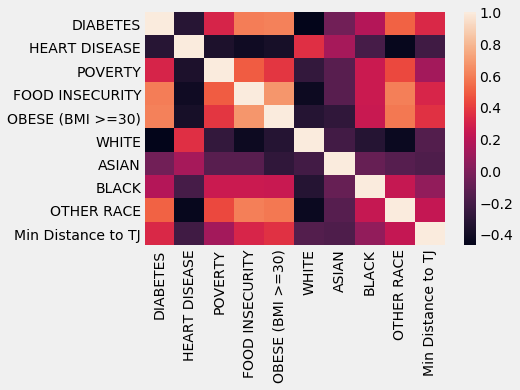

In [41]:
sns.heatmap(corr_data.corr(method="kendall"))

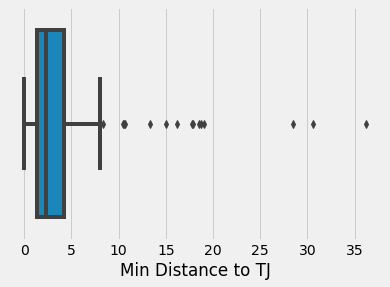

In [42]:
sns.boxplot(x = 'Min Distance to TJ', data = data)

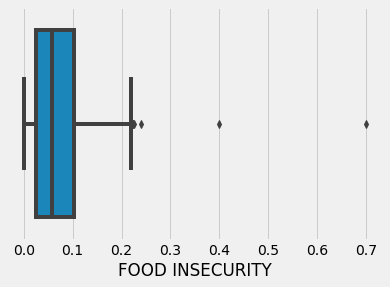

In [43]:
sns.boxplot(x = 'FOOD INSECURITY', data = data)

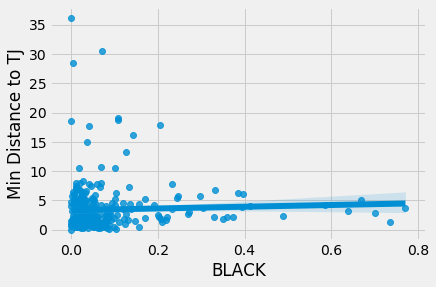

In [44]:
sns.regplot(x="BLACK", y="Min Distance to TJ", data=data);

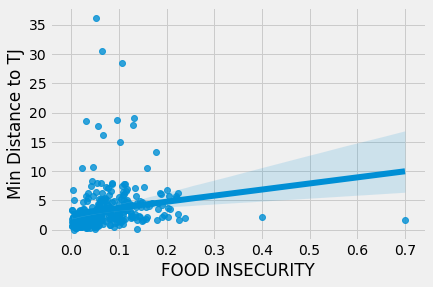

In [45]:
sns.regplot(x="FOOD INSECURITY", y="Min Distance to TJ", data=data);

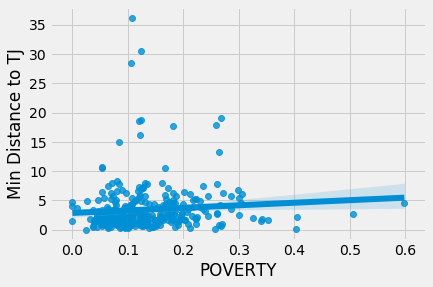

In [46]:
sns.regplot(x="POVERTY", y="Min Distance to TJ", data=data);

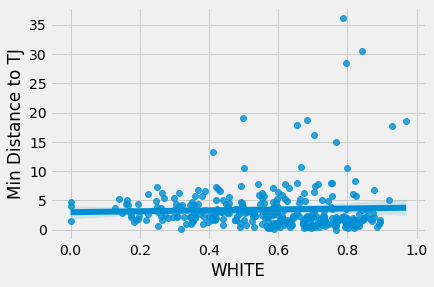

In [47]:
sns.regplot(x="WHITE", y="Min Distance to TJ", data=data);

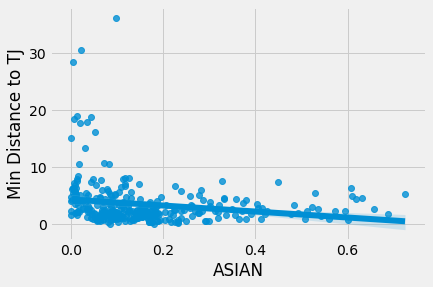

In [48]:
sns.regplot(x="ASIAN", y="Min Distance to TJ", data=data);

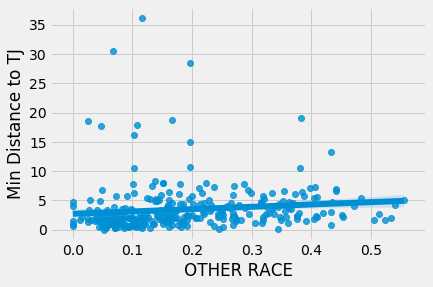

In [49]:
sns.regplot(x="OTHER RACE", y="Min Distance to TJ", data=data);

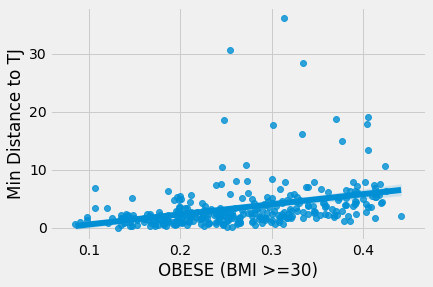

In [50]:
sns.regplot(x="OBESE (BMI >=30)", y="Min Distance to TJ", data=data);

In [51]:
import folium


m = folium.Map(location=[34.0407, -118.2468], zoom_start = 9)

In [52]:
i = 0
while i < 78:
    folium.Circle(radius=20,location=[tjs.iloc[i]['Latitude'], tjs.iloc[i]['Longitude']], color='crimson', fill=False).add_to(m)
    i = i + 1                               
                                       
                                       
                                

In [53]:
m